# 08/26/20 - Writing and testing PSF and noise map generator for KiDS imaging.

In [1]:
# libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.io import fits
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.stats import sigma_clip as clip

In [2]:
# set datapaths
links_path = '/home/shawn/Desktop/links_autoz/'
fits_path = f'{links_path}files/fits/'
fits_image_path = f'{fits_path}images/'
csv_path = f'{links_path}files/csv/'
png_path = f'{links_path}visuals/png/'
pdf_path = f'{links_path}visuals/pdf/'

In [3]:
# import LinKS candidates that are in autoz
links = pd.read_csv(f'{csv_path}links_autoz_sample_latest.csv')
links_ids = links[ ['GAMA_ID','ID'] ].sort_values('ID')
links_ids.to_csv(f'{csv_path}links_ids_list.csv')

In [9]:
def get_noisey(folder, file): # insert fits file path (f'{fits_image_path}links/G262874_26/G262874_26_r.fits')
    
    # get the file ready
    hdul = fits.open(f'{folder}{file}') # open the fits
    print(f'Gettin noisey with {hdul[0].header[6]}') # list object name
    print(hdul.info())
    image = hdul[0].data # select first HDU to be the image
    
    # plot image data
    plt.figure()
    plt.title = (f'{hdul[0].header[6]}')
    plt.imshow(image)#, cmap='gray') # show image in grayscale
    plt.show()
    #
    plt.figure()
    plt.title = (f'{hdul[0].header[6]} signal')
    plt.hist(np.ravel(image),bins=100,log=True) # plot signal in histogram
    plt.show()
    print(f'Mean {np.mean(image)}, Median {np.median(image)}')
    
    # clip to 3sigma around median
    print('Clipping to 3-sigma about median value')
    clipped_image=clip(image, cenfunc='median')
    plt.figure()
    plt.title=(f'{hdul[0].header[6]} noise')
    plt.hist(np.ravel(clipped_image),bins=100,log=True) # plot signal in histogram
    plt.show()
    
    # generate Gaussian noise about mean and std
    mean = clipped_image.mean()
    std = clipped_image.std()
    noise_map = np.random.normal(loc=mean,
                                scale=std,
                                size= image.shape
                                )
    
    # plot noise map
    plt.figure() # show histogram of signal values
    plt.hist(np.ravel(noise_map))
    plt.show()
    plt.figure() # show noise map image
    plt.title=(f'Noise Map for {hdul[0].header[6]}')
    plt.imshow(noise_map, cmap='gray')
    
    # write to fits file
    hdu = fits.PrimaryHDU(noise_map)
    hdu.writeto(f'{folder}{file[:-5]}_noisemap.fits')
    print(f'Image sent to {folder}{file[:-5]}_noisemap.fits')
    
    # good vibes
    print('Congratulations! You simulated random noise! Eat a cookie.')
    
    
#get_noisey(f'{fits_image_path}links/G262874_26/G262874_26_r.fits') # it works!

Gettin noisey with KIDS_136.0_-0.5
Filename: /home/shawn/Desktop/links_autoz/files/fits/images/links/G3629152_1933/1933_r.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      85   (101, 101)   float32   
None


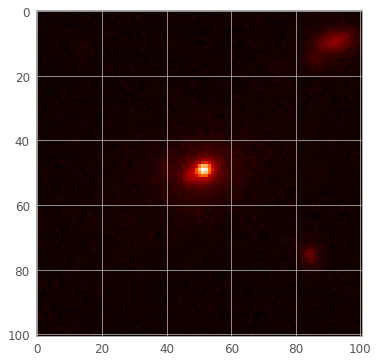

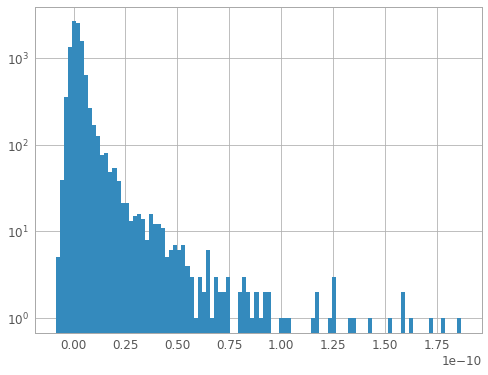

Mean 3.4284547856949787e-12, Median 1.6704145662169156e-12
Clipping to 3-sigma about median value


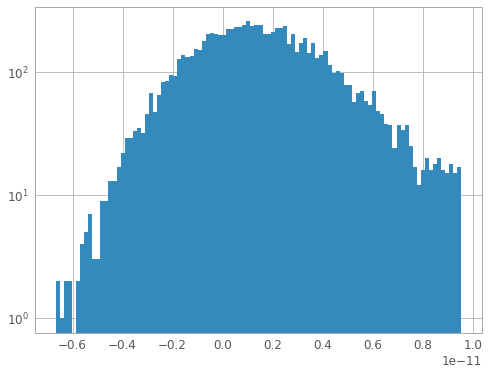

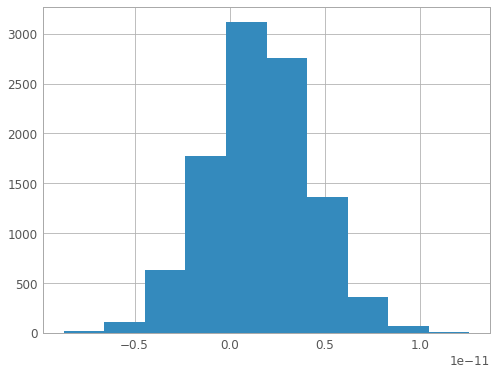

Image sent to /home/shawn/Desktop/links_autoz/files/fits/images/links/G3629152_1933/1933_r_noisemap.fits
Congratulations! You simulated random noise! Eat a cookie.


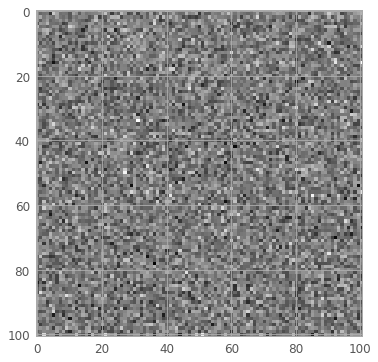

In [10]:
folder = f'{fits_image_path}links/G3629152_1933/'
file = '1933_r.fits'

get_noisey(folder, file)

# It works! Now I just need to figure out an easy way to feed in the files.